In [8]:
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import polars as pl
from polars import col as c
import seaborn as sns

# Get the project's root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level

# Add the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the project's modules
from figure_manager import FigureManager
from figure_manager import generate_plot, generate_plot_with_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load data

In [9]:
# load data
data = pl.read_csv('Males.csv')

<Axes: title={'center': 'Average Wage by Experience and Residence'}, xlabel='Experience', ylabel='Wage'>

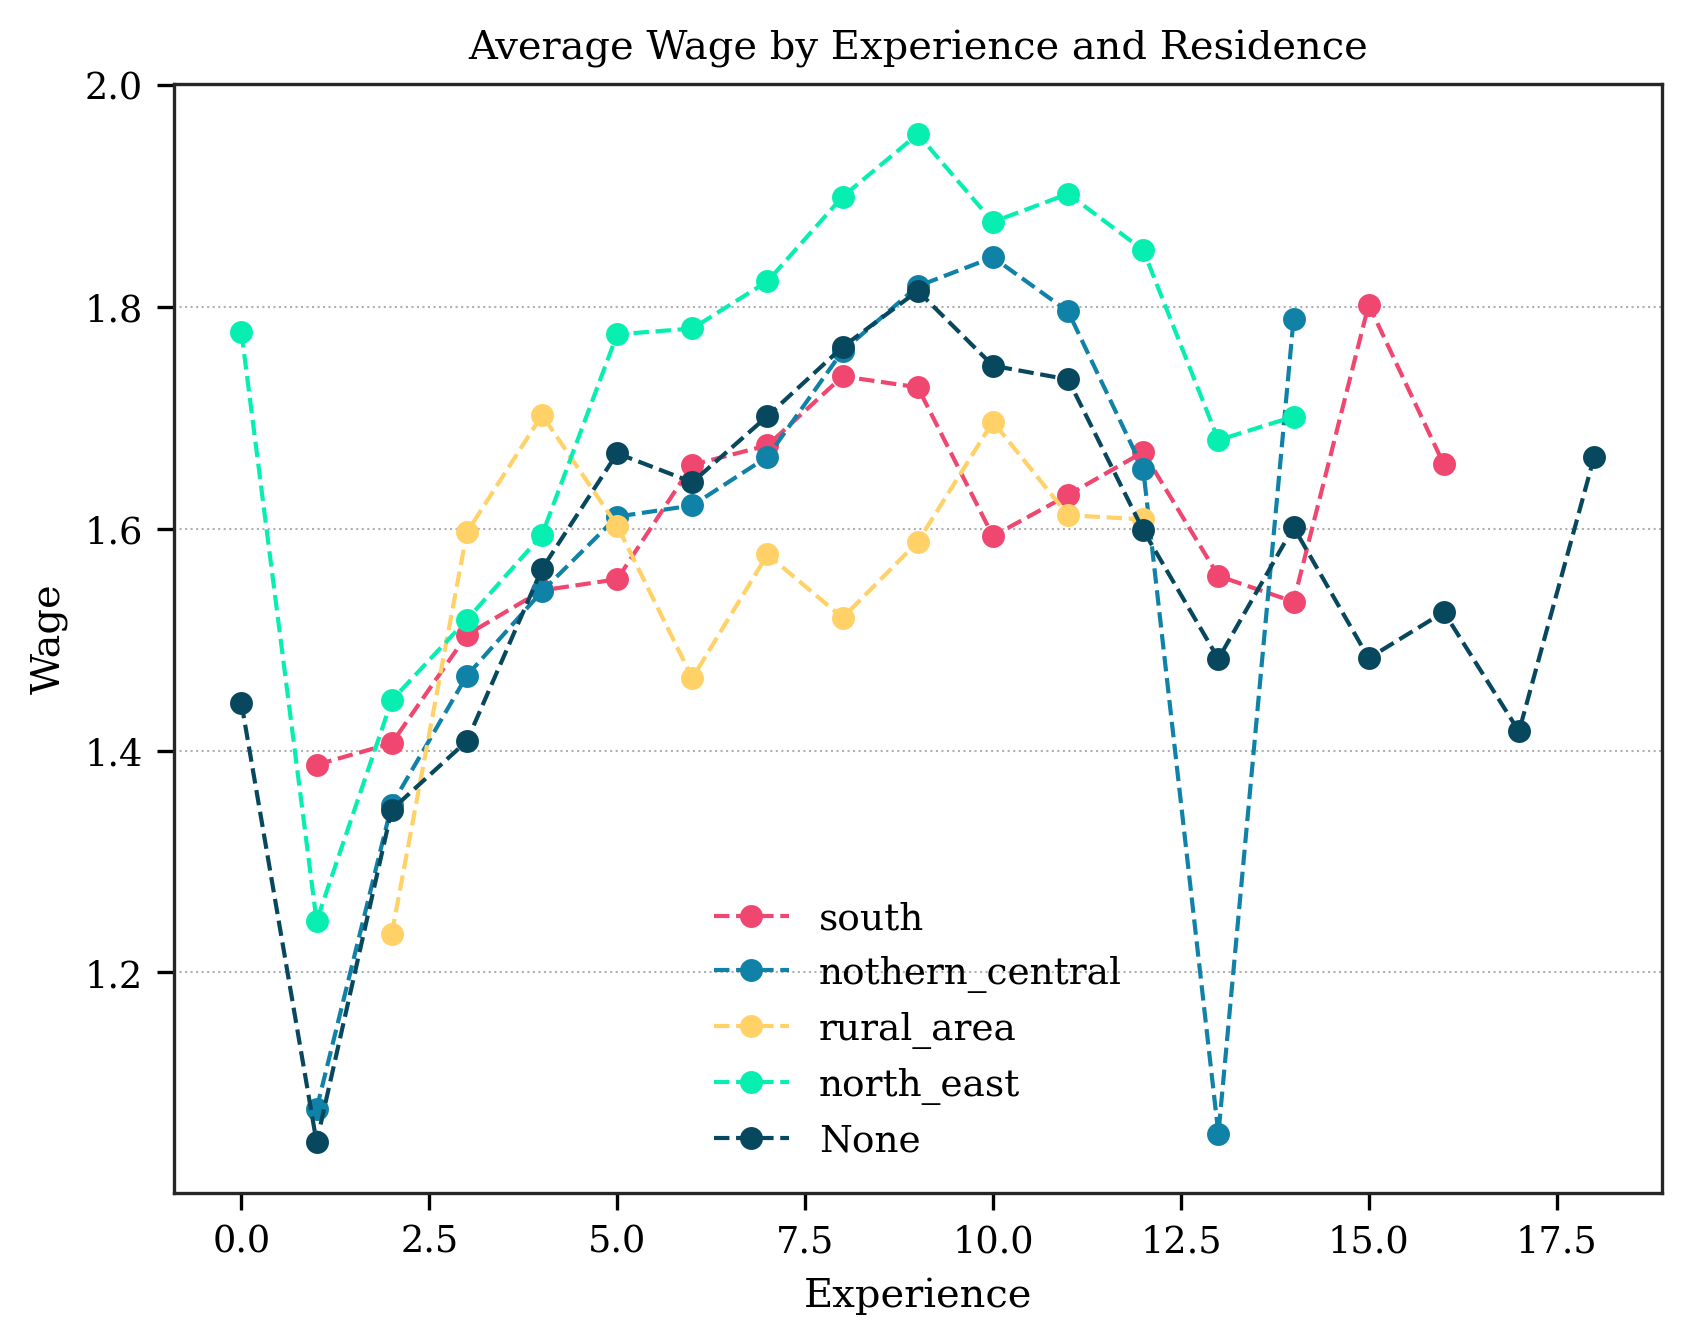

In [10]:
generate_plot(data, x_col='exper', y_col='wage', plot_type='plot', group_by_cols='residence', agg_fct=pl.mean, xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence', plot_settings={'marker': 'o', 'linestyle': '--'}, verbose=True, sort_order=["south", "nothern_central", "rural_area", "north_east"])

Saved full figure to figures/one_big_plot.pdf
Saved subplot to figures/one_big_plot_subplot_1.pdf


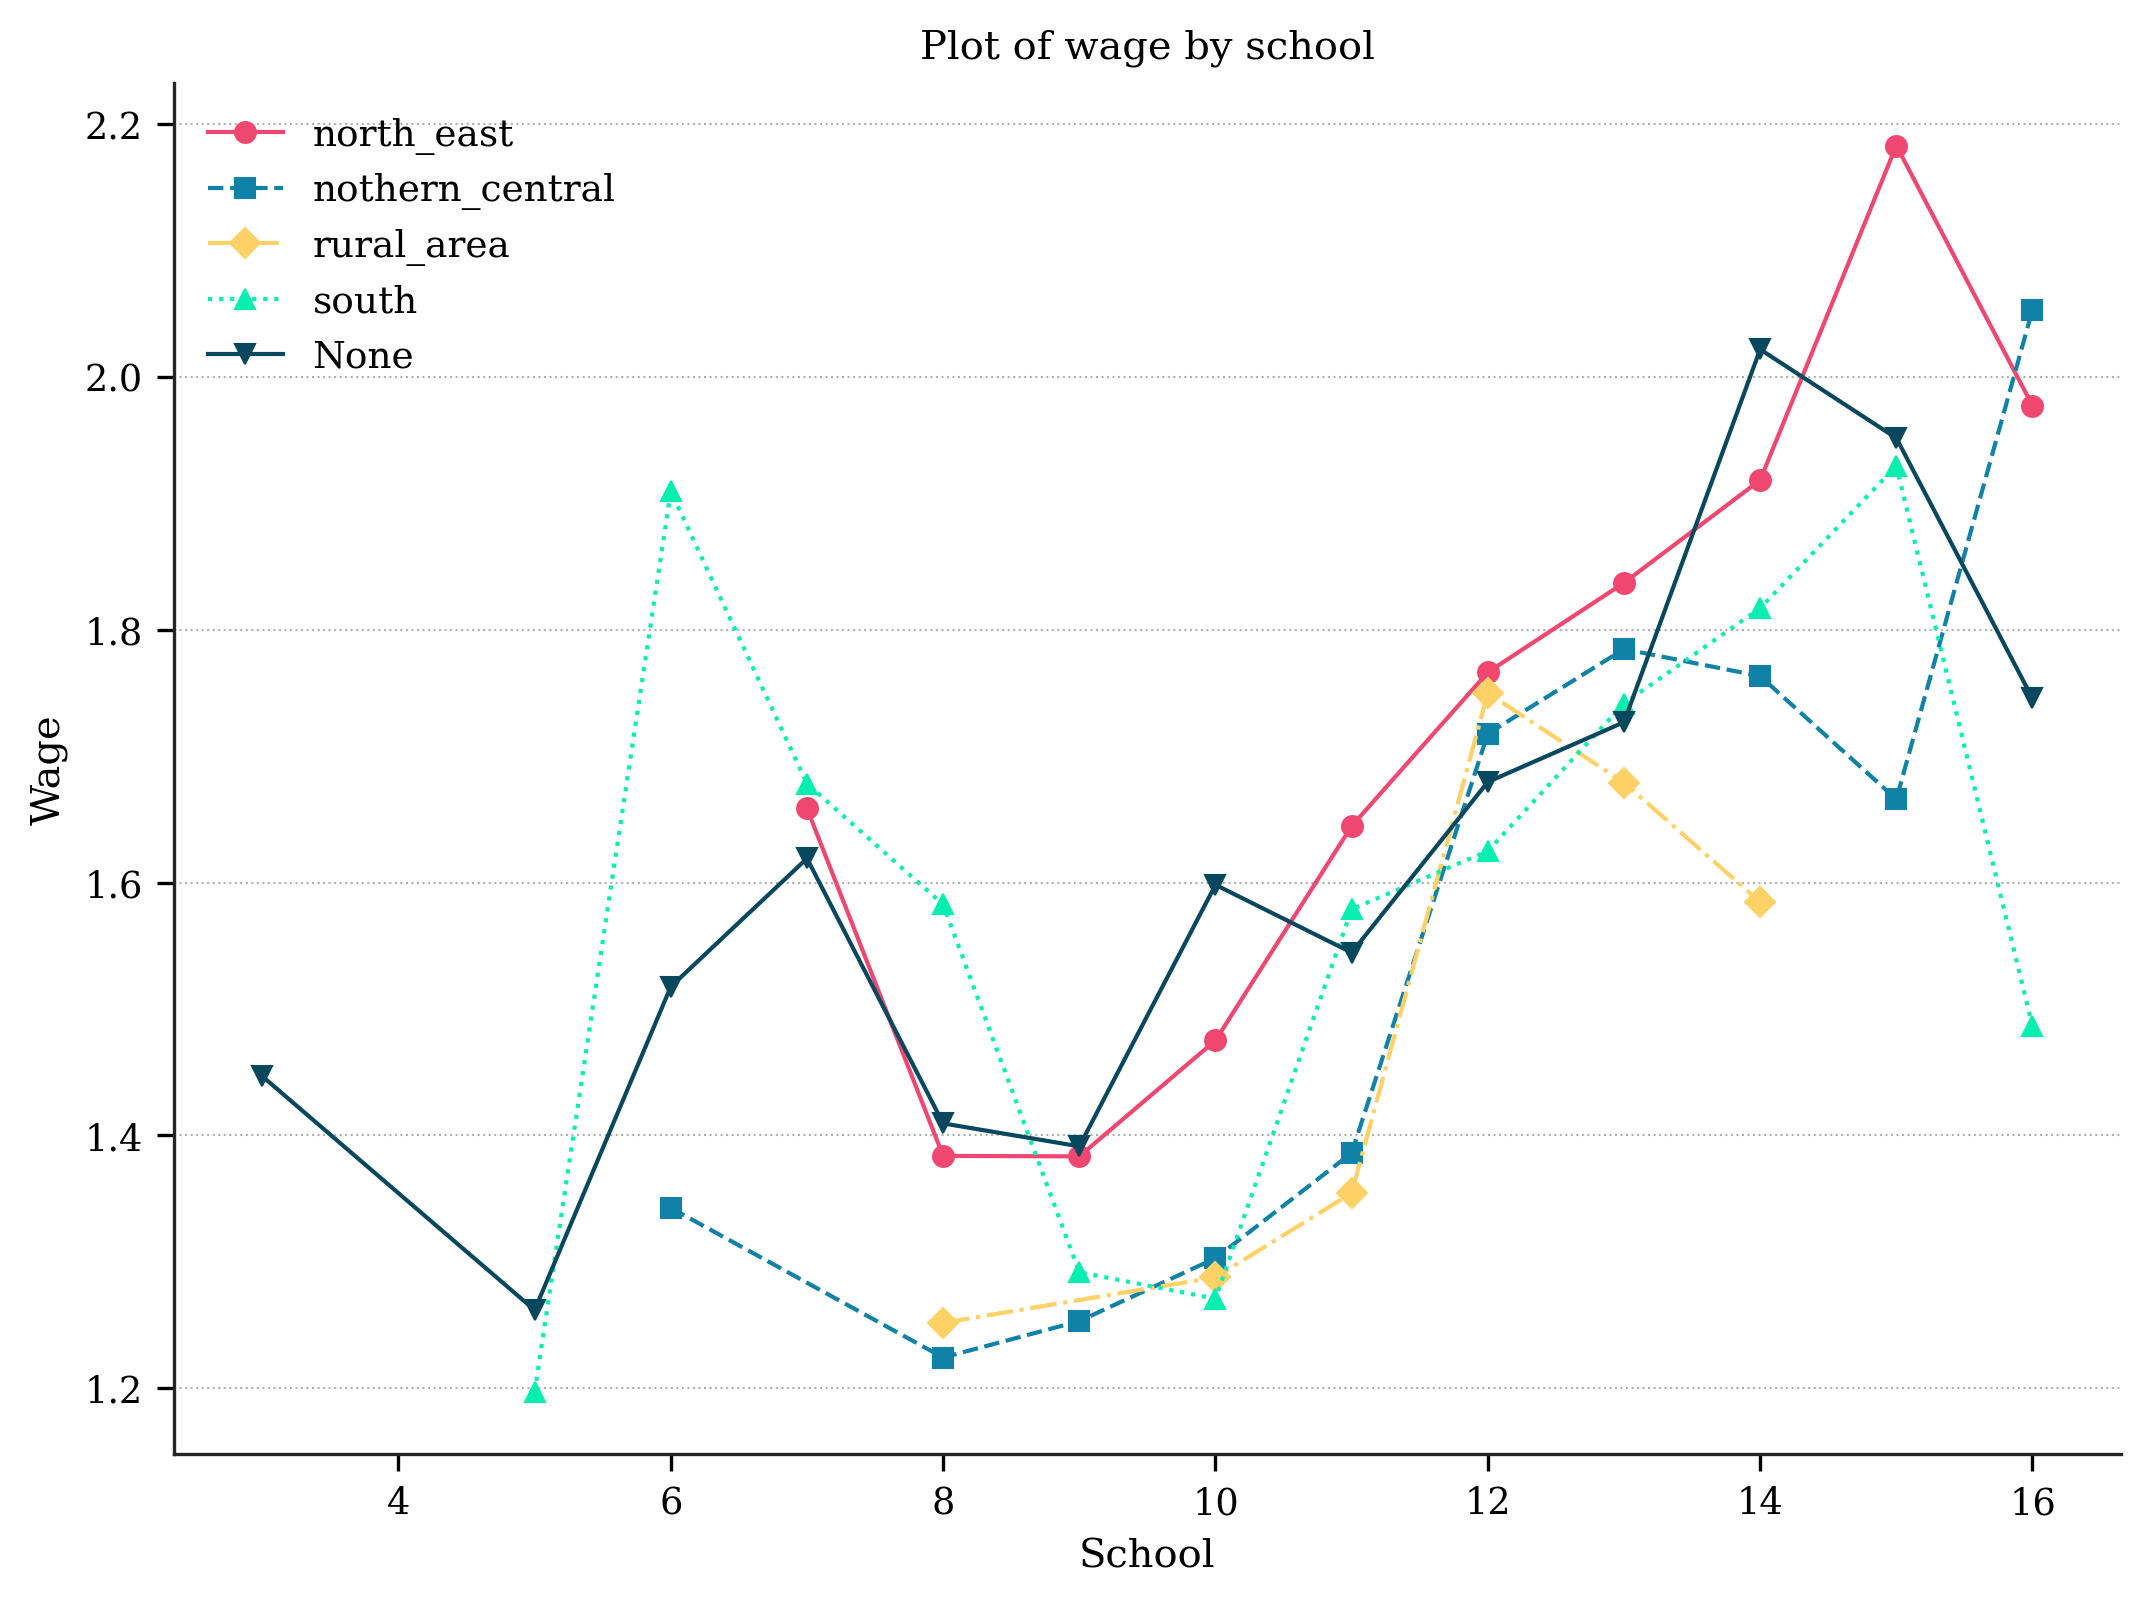

In [11]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=1, n_subplots=1)

axes[0] = generate_plot(data,
                        x_col='school',
                        y_col='wage',
                        plot_type='plot',
                        group_by_cols='residence',
                        agg_fct=pl.mean,
                        ax = axes[0],
                        verbose=False,
                        #title='Average Wage by School and Residence'
                        )

fm.save_figure(filename="one_big_plot")


  Group (north_east) uses 733 observations with fewest (8) at 'school'=[7].



Saved full figure to figures/three_small_plots.pdf
Saved subplot to figures/three_small_plots_subplot_1.pdf
Saved subplot to figures/three_small_plots_subplot_2.pdf
Saved subplot to figures/three_small_plots_subplot_3.pdf


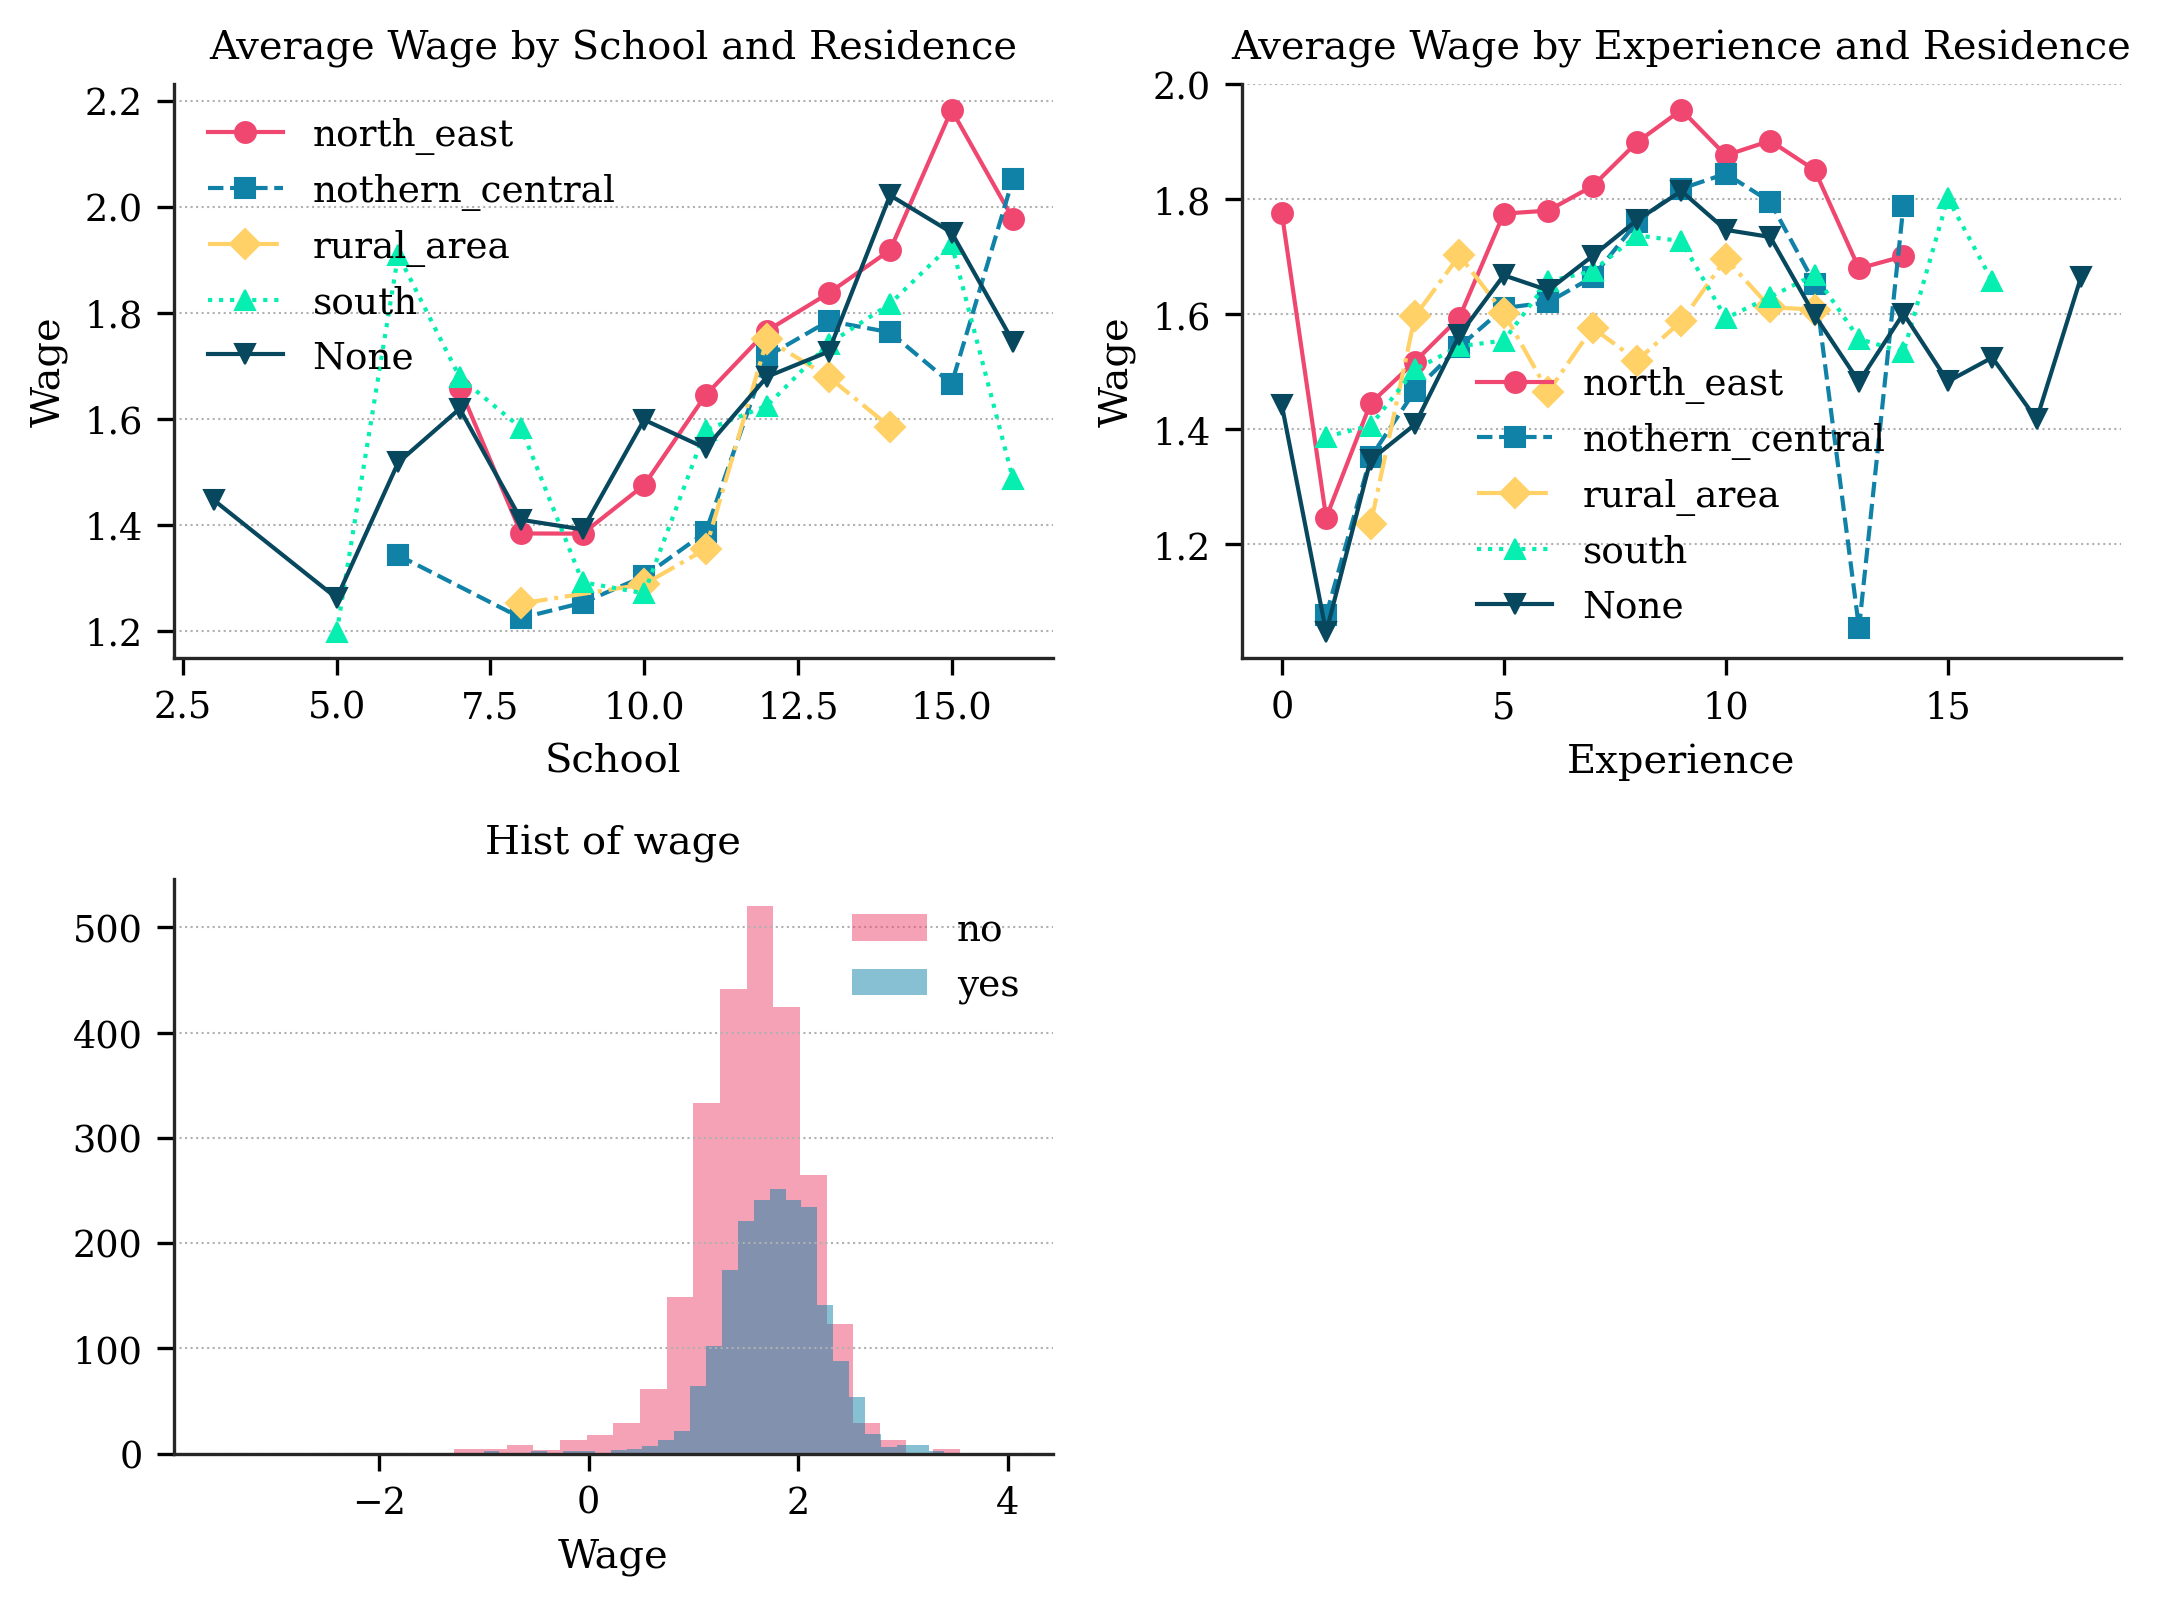

In [12]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)

# settings
verbose = True

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=2, n_cols=2, n_subplots=3)

axes[0] = generate_plot(data, x_col='school', y_col='wage', plot_type='plot', x_bins=5, group_by_cols='residence', agg_fct=pl.mean, ax = axes[0], verbose=verbose, xlabel='School', ylabel='Wage', title='Average Wage by School and Residence')
axes[1] = generate_plot(data, x_col='exper', y_col='wage', plot_type='plot', x_bins=5, group_by_cols='residence', agg_fct=pl.mean, ax = axes[1], verbose=verbose, xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence')
axes[2] = generate_plot(data, x_col='wage', bins=30, plot_type='hist', group_by_cols='maried', ax = axes[2], verbose=verbose, plot_settings={'alpha': 0.5})

# Save the entire figure and subplots
fm.save_figure(filename="three_small_plots")

# Optional: Display the figure
plt.show()

## Standard errors

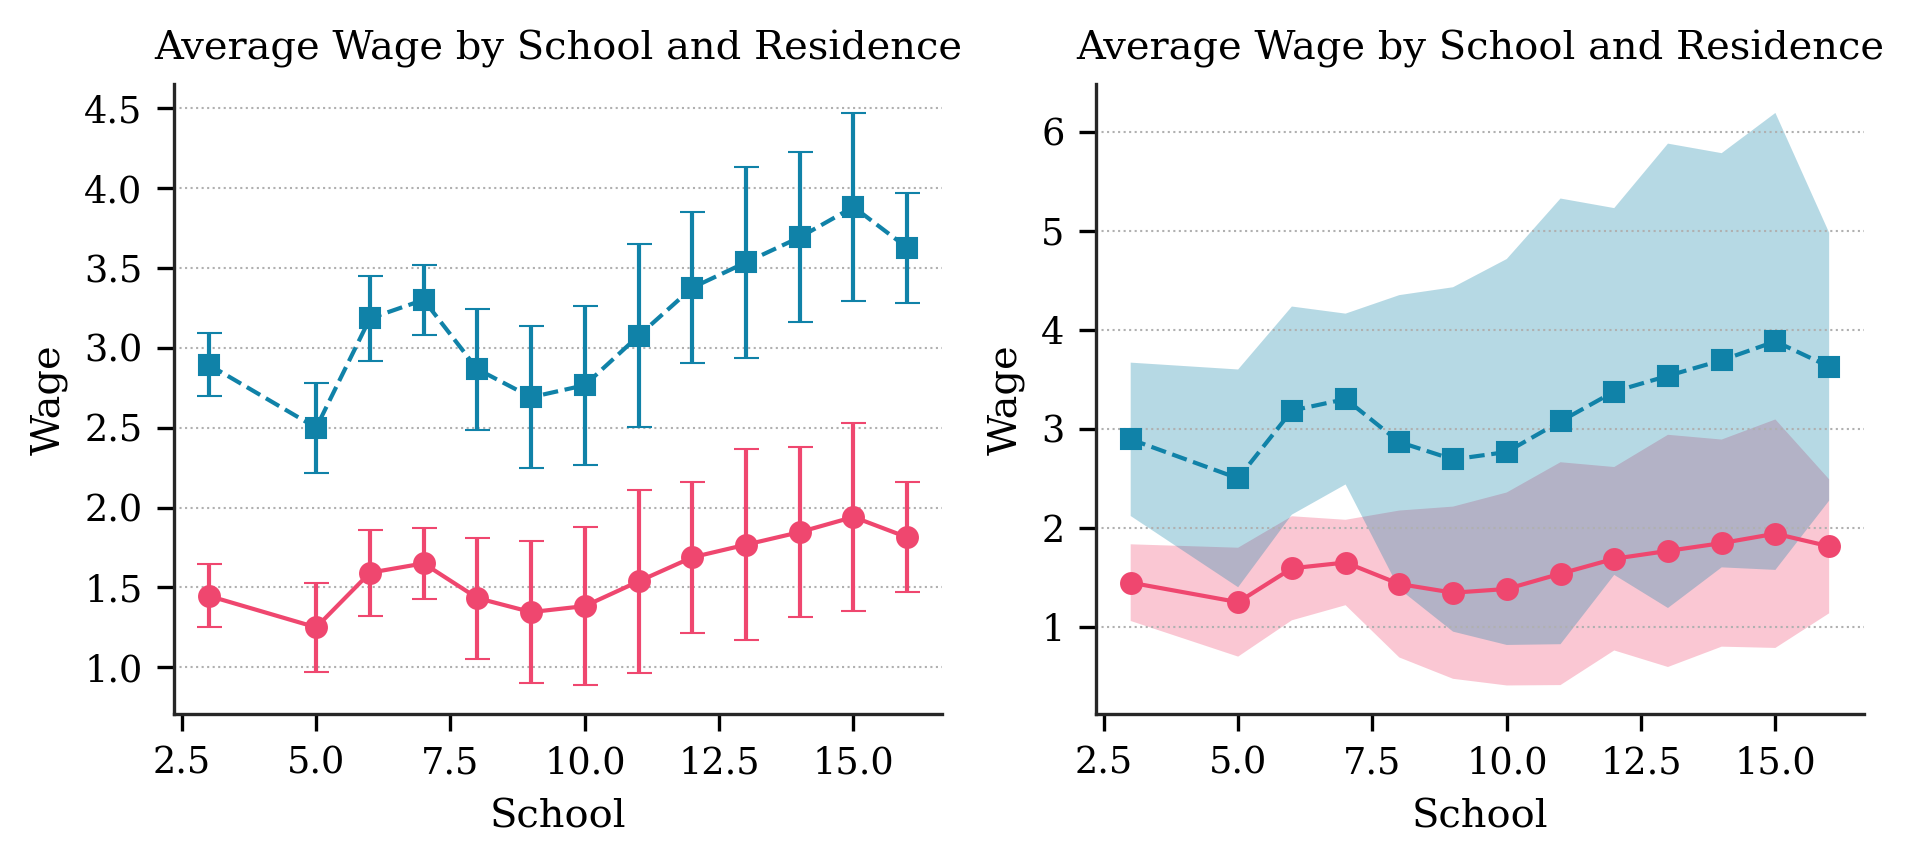

In [35]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)


cd = collapsed_data = data.group_by('school').agg(
    pl.mean('wage').alias('wage_mean'),
    pl.std('wage').alias('wage_std'),
).with_columns(
    (c.wage_mean - c.wage_std*1.96).alias('wage_ci_low'),
    (c.wage_mean + c.wage_std*1.96).alias('wage_ci_high'),
).sort('school')

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=2, n_subplots=2)

axes[0] = generate_plot_with_error(x=cd.get_column("school"), y=cd.get_column("wage_mean"),   y_err=cd.get_column("wage_std"),   ax = axes[0], xlabel='School', ylabel='Wage', title='Average Wage by School and Residence', label='Wage')
axes[0] = generate_plot_with_error(x=cd.get_column("school"), y=cd.get_column("wage_mean")*2, y_err=cd.get_column("wage_std"), ax = axes[0], xlabel='School', ylabel='Wage', title='Average Wage by School and Residence')
axes[1] = generate_plot_with_error(x=cd.get_column("school"), y=cd.get_column("wage_mean"),   y_err=(cd.get_column("wage_ci_low"),   cd.get_column("wage_ci_high")),   ax = axes[1], xlabel='School', ylabel='Wage', title='Average Wage by School and Residence', label="Double Wage")
axes[1] = generate_plot_with_error(x=cd.get_column("school"), y=cd.get_column("wage_mean")*2, y_err=(cd.get_column("wage_ci_low")*2, cd.get_column("wage_ci_high")*2), ax = axes[1], xlabel='School', ylabel='Wage', title='Average Wage by School and Residence')